In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [2]:
#create a pandas dataframes from csv files
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [3]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [4]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

In [5]:
tweets['id'] = pd.to_numeric(tweets['id'], errors='coerce')
tweets['user_id'] = pd.to_numeric(tweets['user_id'], errors='coerce')
tweets['retweet_count'] = pd.to_numeric(tweets['retweet_count'], errors='coerce')
tweets['reply_count'] = pd.to_numeric(tweets['reply_count'], errors='coerce')
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets['num_hashtags'] = pd.to_numeric(tweets['num_hashtags'], errors='coerce')
tweets['num_mentions'] = pd.to_numeric(tweets['num_mentions'], errors='coerce')
tweets['num_urls'] = pd.to_numeric(tweets['num_urls'], errors='coerce')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')

In [6]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.0+ GB


id                       float64
user_id                  float64
retweet_count            float64
reply_count              float64
favorite_count           float64
num_hashtags             float64
num_urls                 float64
num_mentions             float64
created_at        datetime64[ns]
text                      object
dtype: object

In [7]:
tweets.dropna(inplace=True)

In [8]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11764631 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 987.3+ MB


id                       float64
user_id                  float64
retweet_count            float64
reply_count              float64
favorite_count           float64
num_hashtags             float64
num_urls                 float64
num_mentions             float64
created_at        datetime64[ns]
text                      object
dtype: object

In [9]:
tweets.drop_duplicates(inplace=True)
tweets.drop_duplicates(subset=['id'], inplace=True)

In [10]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9819651 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 824.1+ MB


id                       float64
user_id                  float64
retweet_count            float64
reply_count              float64
favorite_count           float64
num_hashtags             float64
num_urls                 float64
num_mentions             float64
created_at        datetime64[ns]
text                      object
dtype: object

In [11]:
tweets.sort_values('favorite_count').head(50)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
9282693,5.213926e+17,4.664802e+08,1.0,0.0,-1.0,0.0,0.0,0.0,2019-10-14 20:11:00,Studiare Studiar Studi Stud Stu St Sto Stoc St...
0,5.093540e+17,3.277463e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
7952606,4.611171e+17,2.353090e+09,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-01 12:17:42,It's all apart of my crazy life lol
7952604,5.308237e+17,5.311555e+08,0.0,0.0,0.0,0.0,1.0,0.0,2019-11-09 20:46:43,Read the Biography of Bonnie Lou http://t.co/...
7952602,1.696720e+17,5.543125e+07,0.0,0.0,0.0,0.0,0.0,1.0,2017-02-16 06:38:59,@tinycala kinsa nanganak?
7952601,5.211212e+17,1.372026e+09,1.0,0.0,0.0,2.0,1.0,0.0,2019-10-14 02:12:22,"New #HR operating models â integrated, scala..."
7952597,5.122863e+17,3.064601e+08,0.0,0.0,0.0,0.0,1.0,0.0,2019-09-19 17:05:57,Check Out This Great Resort in Palm Coast Flor...
7952596,5.274722e+17,4.671235e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-10-31 14:48:56,"Io invece sulla lapide ci voglio scritto ""Cazz..."
7952595,5.147838e+17,5.311646e+08,0.0,0.0,0.0,0.0,1.0,0.0,2019-09-26 14:29:59,Check Out The Top 10 European Beers http://t....
7952594,5.111389e+17,1.947718e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-16 13:06:27,"3 meals a day a roof over my head, two cars, a..."


In [12]:
#aggiungere per ultimi 3 attributi
tweets = tweets[tweets['retweet_count'] >= 0]
tweets = tweets[tweets['reply_count'] >= 0]
tweets = tweets[tweets['favorite_count'] >= 0]
tweets.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9819650 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 824.1+ MB


In [13]:
tweets.sort_values('favorite_count').head(50)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,5.093540e+17,3.277463e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
7952606,4.611171e+17,2.353090e+09,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-01 12:17:42,It's all apart of my crazy life lol
7952604,5.308237e+17,5.311555e+08,0.0,0.0,0.0,0.0,1.0,0.0,2019-11-09 20:46:43,Read the Biography of Bonnie Lou http://t.co/...
7952602,1.696720e+17,5.543125e+07,0.0,0.0,0.0,0.0,0.0,1.0,2017-02-16 06:38:59,@tinycala kinsa nanganak?
7952601,5.211212e+17,1.372026e+09,1.0,0.0,0.0,2.0,1.0,0.0,2019-10-14 02:12:22,"New #HR operating models â integrated, scala..."
7952597,5.122863e+17,3.064601e+08,0.0,0.0,0.0,0.0,1.0,0.0,2019-09-19 17:05:57,Check Out This Great Resort in Palm Coast Flor...
7952596,5.274722e+17,4.671235e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-10-31 14:48:56,"Io invece sulla lapide ci voglio scritto ""Cazz..."
7952595,5.147838e+17,5.311646e+08,0.0,0.0,0.0,0.0,1.0,0.0,2019-09-26 14:29:59,Check Out The Top 10 European Beers http://t....
7952594,5.111389e+17,1.947718e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-16 13:06:27,"3 meals a day a roof over my head, two cars, a..."
7952593,4.731191e+17,1.630616e+09,0.0,0.0,0.0,0.0,0.0,0.0,2019-06-03 15:09:07,its just me


In [14]:
tweets['retweet_count'].quantile(0.75) + 1.5*(tweets['retweet_count'].quantile(0.75)-tweets['retweet_count'].quantile(0.25))

2.5

In [15]:
tweets.replace(to_replace='inf', value=0, inplace=True)
tweets.sort_values('retweet_count', ascending=False)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
10648752,8.300843e+09,1.857048e+09,3.000000e+09,0.0,0.0,2.0,1.0,0.0,2019-10-23 04:58:10,iOS 8.1 brings Apple Pay and SMS handoff to th...
4412479,5.812889e+13,9.527294e+08,8.702076e+06,0.0,0.0,0.0,0.0,1.0,2020-02-10 03:47:15,RT @tbhdaphne: I WANT ONE SO BAD http://t.co/h...
1741494,4.403372e+17,2.126348e+08,3.350111e+06,0.0,0.0,1.0,0.0,1.0,2019-03-05 04:05:37,RT @TheEllenShow: If only Bradley's arm was lo...
2423679,4.403374e+17,2.167115e+09,3.350110e+06,0.0,0.0,1.0,0.0,1.0,2019-03-05 04:06:35,RT @TheEllenShow: If only Bradley's arm was lo...
4232230,4.403854e+17,1.846383e+07,3.350110e+06,0.0,0.0,1.0,0.0,1.0,2019-03-05 07:17:23,RT @TheEllenShow: If only Bradley's arm was lo...
...,...,...,...,...,...,...,...,...,...,...
4683477,5.584488e+17,5.647701e+07,0.000000e+00,0.0,0.0,0.0,0.0,2.0,2020-01-25 02:19:12,"@TheJulieBenson @TeelaJBrown I switched to ""re..."
4683476,5.780770e+17,1.635234e+08,0.000000e+00,0.0,0.0,0.0,0.0,1.0,2020-03-19 06:14:37,@sabrinairis78 Hahah I can try but I don't wan...
4683474,5.139700e+17,4.681443e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2019-09-24 08:36:10,Chi non sa riconoscere il valore della persona...
4683473,5.889352e+17,2.540602e+09,0.000000e+00,0.0,0.0,0.0,0.0,1.0,2020-04-18 05:20:58,@softlycanthropy BUT ALSO FRATERNAL ARGENT TWINS


In [17]:
retweet_clean = tweets[tweets['retweet_count'] != 0]['retweet_count']
reply_clean = tweets[tweets['reply_count'] != 0]['reply_count']
favorite_clean = tweets[tweets['favorite_count'] != 0]['favorite_count']
hashtags_clean = tweets[tweets['num_hashtags'] != 0]['num_hashtags']
urls_clean = tweets[tweets['num_urls'] != 0]['num_urls']
mentions_clean = tweets[tweets['num_mentions'] != 0]['num_mentions']

In [18]:
retweet_clean.quantile(0.75) + 1.5*(retweet_clean.quantile(0.75)-retweet_clean.quantile(0.25))

371.0

In [19]:
retweet_clean.median()

4.0

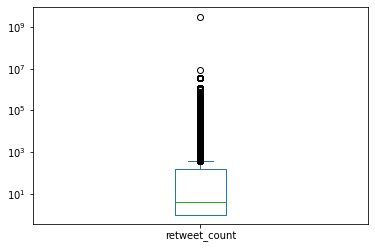

In [20]:
retweet_clean.plot.box()
plt.yscale('log')

In [21]:
#decidere se togliere il valore anomalo 
retweet_clean = retweet_clean.to_frame()
retweet_clean2 = retweet_clean[retweet_clean['retweet_count'] < 4000000]['retweet_count']

In [22]:
retweet_clean2.quantile(0.75) + 1.5*(retweet_clean2.quantile(0.75)-retweet_clean2.quantile(0.25))

371.0

In [23]:
retweet_clean2.median()

4.0

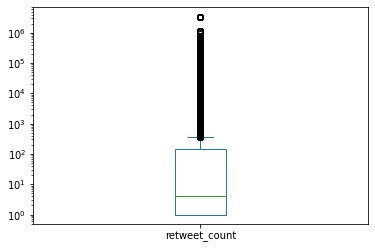

In [24]:
retweet_clean2.plot.box()
plt.yscale('log')

In [25]:
favorite_clean.quantile(0.75) + 1.5*(favorite_clean.quantile(0.75)-favorite_clean.quantile(0.25))

3.5

In [26]:
#decidere se togliere il valore anomalo 
favorite_clean2 = favorite_clean.to_frame()
favorite_clean2 = favorite_clean2[favorite_clean2['favorite_count'] < 4000000]['favorite_count']

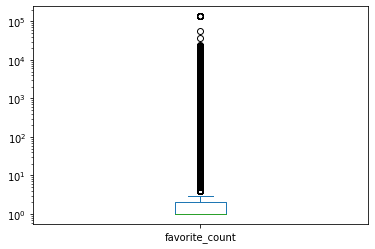

In [27]:
favorite_clean2.plot.box()
plt.yscale('log')

In [31]:
favorite_clean2.mad(axis = 0, skipna = True)


13.693186332135593

In [32]:
retweet_clean.mad(axis = 0, skipna = True)


retweet_count    5554.872025
dtype: float64

In [33]:
retweet_clean2.mad(axis = 0, skipna = True)


3526.2021228005683

In [39]:
clean = tweets
clean['retweet_count'] = tweets[tweets['retweet_count'] != 0]['retweet_count']
clean['retweet_count'] = clean[clean['retweet_count'] < 4000000]['retweet_count']
clean['reply_count'] = tweets[tweets['reply_count'] != 0]['reply_count']
clean['favorite_count'] = tweets[tweets['favorite_count'] != 0]['favorite_count']
clean['favorite_count'] = clean[clean['favorite_count'] < 4000000]['favorite_count']
clean['num_hashtags'] = tweets[tweets['num_hashtags'] != 0]['num_hashtags']
clean['num_urls'] = tweets[tweets['num_urls'] != 0]['num_urls']
clean['num_mentions'] = tweets[tweets['num_mentions'] != 0]['num_mentions']

clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9819650 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 824.1+ MB


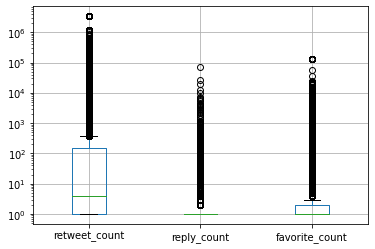

In [40]:
clean.boxplot(column=['retweet_count', 'reply_count', 'favorite_count'])
plt.yscale('log')

In [41]:
clean['reply_count'].median()

1.0

In [52]:
clean['reply_count'].quantile(0.75)

1.0

In [59]:
limit_reply = clean['reply_count'].quantile(0.75) + 1.5*(clean['reply_count'].quantile(0.75)-clean['reply_count'].quantile(0.25))
clean[(clean['reply_count'] > limit_reply)]['reply_count'].count()

3454

In [63]:
limit_retweet = clean['retweet_count'].quantile(0.75) + 1.5*(clean['retweet_count'].quantile(0.75)-clean['retweet_count'].quantile(0.25))
clean[(clean['retweet_count'] > limit_retweet)]['retweet_count'].count()

525827

In [62]:
limit_favorite = clean['favorite_count'].quantile(0.75) + 1.5*(clean['favorite_count'].quantile(0.75)-clean['favorite_count'].quantile(0.25))
clean[(clean['favorite_count'] > limit_favorite)]['favorite_count'].count()

285152